# Step 1: Preprocessing

Pick any dataset from the list, implement the **preprocessing** and justify the preprocessing steps,
**extract features** and justify the methods used, **select features** and justify the methods used. Some of this is done already in one of the previous assignments. You can reuse things. 

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Load the Data

In [140]:
graduates_df = pd.read_csv('graduation_dataset.csv')
graduates_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Explore data


In [141]:
graduates_df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [142]:
graduates_df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [143]:
graduates_df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [144]:
graduates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [145]:
categorical_cols = graduates_df.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:", categorical_cols)

Categorical columns: ['Target']


##  Removing any values outside the given values from description

In [146]:
import pandas as pd

# Load your dataset
# df = pd.read_csv('your_data.csv')  # Uncomment and replace 'your_data.csv' with your dataset file

# Define the valid ranges or categories for each attribute
valid_values = {
    "Marital status": [1, 2, 3, 4, 5, 6],
    "Application mode": [1, 2, 5, 7, 10, 15, 16, 17, 18, 26, 27, 39, 42, 43, 44, 51, 53, 57],
    "Application order": range(0, 10),  # 0 to 9
    "Course": [33, 171, 8014, 9003, 9070, 9085, 9119, 9130, 9147, 9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991],
    "Daytime/evening attendance": [0, 1],
    "Previous qualification": [1, 2, 3, 4, 5, 6, 9, 10, 12, 14, 15, 19, 38, 39, 40, 42, 43],
    "Previous qualification grade": range(0, 201),  # 0 to 200
    "Nationality": [1, 2, 6, 11, 13, 14, 17, 21, 22, 24, 25, 26, 32, 41, 62, 100, 101, 103, 105, 108, 109],
    "Mother's qualification": [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 18, 19, 22, 26, 27, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
    "Father's qualification": [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 20, 22, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
    "Mother's occupation": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 122, 123, 125, 131, 132, 134, 141, 143, 144, 151, 152, 153, 171, 173, 175, 191, 192, 193, 194],
    "Father's occupation": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 101, 102, 103, 112, 114, 121, 122, 123, 124, 131, 132, 134, 135, 141, 143, 144, 151, 152, 153, 154, 161, 163, 171, 172, 174, 175, 181, 182, 183, 192, 193, 194, 195],
    "Admission Grade": range(0, 201),  # 0 to 200
    "Displaced": [0, 1],
    "Educational pecial needs": [0, 1],
    "Debtor": [0, 1],
    "Tuition fees up to date": [0, 1],
    "Gender": [0, 1],
    "Scholarship holder": [0, 1],
    "Age at enrollment": range(0, 120),  # Assuming an age range for validation
    "International": [0, 1],
    "Curricular units 1st sem (credited)": range(0, 100),  # Set a reasonable max value
    "Curricular units 1st Sem (Enrolled)": range(0, 100),
    "Curricular units 1st Sem (Evaluations)": range(0, 100),
    "Curricular units 1st Sem (Approved)": range(0, 100),
    "Curricular units 1st Sem (Grade)": range(0, 21),  # 0 to 20
    "Curricular units 1st Sem (Without Evaluations)": range(0, 100),
    "Curricular units 2nd Sem (Credited)": range(0, 100),
    "Curricular units 2nd Sem (Enrolled)": range(0, 100),
    "Curricular units 2nd Sem (Evaluations)": range(0, 100),
    "Curricular units 2nd Sem (Approved)": range(0, 100),
    "Curricular units 2nd Sem (Grade)": range(0, 21),  # 0 to 20
    "Curricular units 2nd Sem (Without Evaluations)": range(0, 100),
    "Unemployment Rate": range(0, 101),  # 0 to 100%
    "Inflation Rate": range(-100, 101),  # Assuming a plausible range
    "GDP": (0, float('inf')),  # Positive values only
    "Target": ["Dropout", "Enrolled", "Graduate"]
}

# Function to validate and filter rows
def filter_invalid_values(df):
    for column, valid_range in valid_values.items():
        if column in df.columns:
            # Check if valid_range is a range or list
            if isinstance(valid_range, range) or isinstance(valid_range, list):
                df = df[df[column].isin(valid_range)]
            elif isinstance(valid_range, tuple):  # For GDP where we check > 0
                df = df[df[column] > valid_range[0]]
            else:  # For categorical target
                df = df[df[column].isin(valid_range)]
    return df

# Apply the function to the DataFrame
df_cleaned = filter_invalid_values(graduates_df)

# Display the cleaned DataFrame
print(df_cleaned)


Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance, Previous qualification, Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x 35 columns]


## Encoding

Gjør om Target til at verdiene der har 0, 1, 2

* 0 --> Dropout
* 1 --> Enrolled
* 2 --> Graduate

In [147]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Target' column to encode it
graduates_df['Target_encoded'] = le.fit_transform(graduates_df['Target'])

# Print the mapping of original values to encoded labels
print("Label Encoding Mapping:")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f'{original}: {encoded}')

# Drop the original 'Target' column
graduates_df = graduates_df.drop(columns=['Target'])

# Display the first few rows of the updated DataFrame
graduates_df.head()



Label Encoding Mapping:
Dropout: 0
Enrolled: 1
Graduate: 2


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [148]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = [
    'Application mode', 'Course', 'Previous qualification', 
    'Nacionality', "Mother's qualification", "Father's qualification", 
    "Mother's occupation", "Father's occupation"
]

# Apply Label Encoding to each specified column
for col in columns_to_encode:
    graduates_df[col] = label_encoder.fit_transform(graduates_df[col])

# Display the first few rows of the DataFrame after encoding
graduates_df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
0,1,7,5,1,1,0,0,12,9,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,5,1,10,1,0,0,0,2,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,0,5,4,1,0,0,21,26,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,7,2,14,1,0,0,22,26,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,11,1,2,0,0,0,21,27,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


Number of outliers in Age at Enrollment: 441
      Marital status  Application mode  Application order  Course  \
4                  2                11                  1       2   
5                  2                11                  1      16   
35                 1                11                  1       0   
36                 1                11                  1       6   
37                 1                13                  1       8   
...              ...               ...                ...     ...   
4388               2                13                  1       8   
4400               2                11                  1      16   
4408               2                11                  1      14   
4409               2                13                  1      16   
4415               4                11                  1      11   

      Daytime/evening attendance  Previous qualification  Nacionality  \
4                              0                     

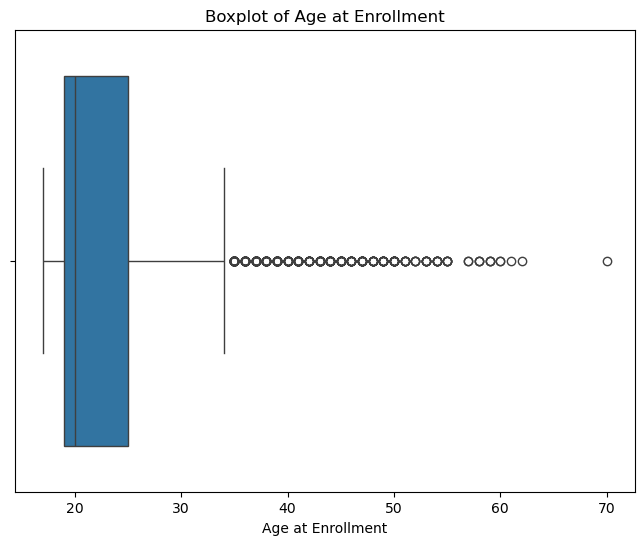

In [149]:
# Calculate Q1, Q3, and IQR for the "Age at Enrollment" column
Q1 = graduates_df['Age at enrollment'].quantile(0.25)
Q3 = graduates_df['Age at enrollment'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds for the "Age at Enrollment" column
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Find the outliers in the "Age at Enrollment" column
outliers = (graduates_df['Age at enrollment'] < lower_bound) | (graduates_df['Age at enrollment'] > upper_bound)

# Count the total number of outliers
num_outliers = outliers.sum()

print(f'Number of outliers in Age at Enrollment: {num_outliers}')

# Display the rows with outliers in the "Age at Enrollment" column
print(graduates_df[outliers])

# Create the boxplot for "Age at Enrollment"
plt.figure(figsize=(8, 6))
sns.boxplot(x=graduates_df['Age at enrollment'])
plt.title('Boxplot of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.show()

In [150]:
# Remove rows where "Age at Enrollment" is greater than 35
graduates_filtered_df = graduates_df[graduates_df['Age at enrollment'] <= 35]

# Display the first few rows of the filtered DataFrame
graduates_filtered_df.head(100)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
0,1,7,5,1,1,0,0,12,9,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,5,1,10,1,0,0,0,2,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,0,5,4,1,0,0,21,26,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,7,2,14,1,0,0,22,26,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
6,1,0,1,11,1,0,0,12,27,7,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,2,9,1,0,0,21,27,4,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,0
107,1,0,1,5,1,0,0,0,0,4,...,0,6,17,4,13.250000,0,15.5,2.8,-4.06,0
108,1,0,5,11,1,0,0,2,3,4,...,0,7,10,5,12.300000,0,12.4,0.5,1.79,0
109,1,7,2,15,1,0,0,12,0,9,...,0,7,10,3,13.000000,0,16.2,0.3,-0.92,1


Number of outliers in Previous qualification: 707
      Marital status  Application mode  Application order  Course  \
5                  2                11                  1      16   
13                 1                16                  1      10   
30                 1                14                  1       3   
36                 1                11                  1       6   
39                 1                14                  1       7   
...              ...               ...                ...     ...   
4401               1                 3                  1       5   
4404               2                11                  1       7   
4411               1                14                  1       7   
4415               4                11                  1      11   
4418               1                14                  1       4   

      Daytime/evening attendance  Previous qualification  Nacionality  \
5                              0                

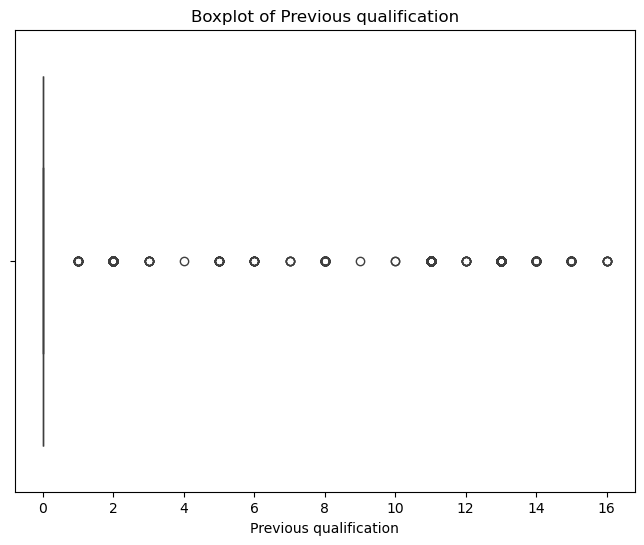

In [151]:
# Calculate Q1, Q3, and IQR for the "Age at Enrollment" column
Q1 = graduates_df['Previous qualification'].quantile(0.25)
Q3 = graduates_df['Previous qualification'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds for the "Age at Enrollment" column
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Find the outliers in the "Age at Enrollment" column
outliers = (graduates_df['Previous qualification'] < lower_bound) | (graduates_df['Previous qualification'] > upper_bound)

# Count the total number of outliers
num_outliers = outliers.sum()

print(f'Number of outliers in Previous qualification: {num_outliers}')

# Display the rows with outliers in the "Age at Enrollment" column
print(graduates_df[outliers])

# Create the boxplot for "Age at Enrollment"
plt.figure(figsize=(8, 6))
sns.boxplot(x=graduates_df['Previous qualification'])
plt.title('Boxplot of Previous qualification')
plt.xlabel('Previous qualification')
plt.show()

## Normalization

In [152]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
graduates_normalized_df = graduates_df.copy()
min_max_scaler = MinMaxScaler()
graduates_normalized_df[['Application order', 'Previous qualification',  'Age at enrollment',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
    'Curricular anits 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate']] = min_max_scaler.fit_transform(
        graduates_df[['Application order', 'Previous qualification',  'Age at enrollment',
            'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
            'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
            'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
            'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
            'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
            'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
            'Unemployment rate', 'Inflation rate']])


graduates_normalized_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded,Curricular anits 2nd sem (grade)
0,1,7,0.555556,1,1,0.0,0,12,9,5,...,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,1.74,0,0.000000
1,1,5,0.111111,10,1,0.0,0,0,2,3,...,0.26087,0.181818,0.30,13.666667,0.0,0.732558,0.111111,0.79,2,0.735897
2,1,0,0.555556,4,1,0.0,0,21,26,9,...,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,1.74,0,0.000000
3,1,7,0.222222,14,1,0.0,0,22,26,5,...,0.26087,0.303030,0.25,12.400000,0.0,0.209302,0.000000,-3.12,2,0.667692
4,2,11,0.111111,2,0,0.0,0,21,27,9,...,0.26087,0.181818,0.30,13.000000,0.0,0.732558,0.111111,0.79,2,0.700000


In [153]:
from sklearn.preprocessing import LabelEncoder

ordinal_columns = ['Marital status', 'Application mode', 'Nacionality', 
                   "Mother's qualification", "Father's qualification", "Mother's occupation", 
                   "Father's occupation"]

le = LabelEncoder()
for col in ordinal_columns:
    graduates_normalized_df[col] = le.fit_transform(graduates_normalized_df[col])

graduates_normalized_df.head(100)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded,Curricular anits 2nd sem (grade)
0,0,7,0.555556,1,1,0.0,0,12,9,5,...,0.000000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,1.74,0,0.000000
1,0,5,0.111111,10,1,0.0,0,0,2,3,...,0.260870,0.181818,0.30,13.666667,0.0,0.732558,0.111111,0.79,2,0.735897
2,0,0,0.555556,4,1,0.0,0,21,26,9,...,0.260870,0.000000,0.00,0.000000,0.0,0.372093,0.488889,1.74,0,0.000000
3,0,7,0.222222,14,1,0.0,0,22,26,5,...,0.260870,0.303030,0.25,12.400000,0.0,0.209302,0.000000,-3.12,2,0.667692
4,1,11,0.111111,2,0,0.0,0,21,27,9,...,0.260870,0.181818,0.30,13.000000,0.0,0.732558,0.111111,0.79,2,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,5,0.111111,6,1,0.0,11,22,2,9,...,0.217391,0.333333,0.15,13.250000,0.0,0.732558,0.111111,0.79,1,0.713462
96,0,0,0.555556,14,1,0.0,0,21,0,5,...,0.260870,0.181818,0.30,13.333333,0.0,0.151163,0.488889,3.51,2,0.717949
97,0,0,0.555556,11,1,0.0,0,21,26,7,...,0.347826,0.272727,0.40,14.477778,0.0,0.558140,0.288889,1.79,2,0.779573
98,0,0,0.111111,5,1,0.0,0,0,1,9,...,0.217391,0.212121,0.25,13.800000,0.0,0.593023,1.000000,-1.70,1,0.743077


## Correlation matrix

In [154]:


# Calculate the correlation matrix
correlation_matrix = graduates_normalized_df.corr().abs()  # Take absolute value to identify strongest correlations

# Set the diagonal to zero to ignore self-correlation
np.fill_diagonal(correlation_matrix.values, 0)

# Unstack the matrix, sort by correlation, and select the top pairs
sorted_correlations = correlation_matrix.unstack().sort_values(ascending=False)

# Display the top correlated pairs
top_correlations = sorted_correlations.head(30)
print("Top correlated attribute pairs:\n", top_correlations)


Top correlated attribute pairs:
 Curricular anits 2nd sem (grade)        Curricular units 2nd sem (grade)          1.000000
Curricular units 2nd sem (grade)        Curricular anits 2nd sem (grade)          1.000000
Curricular units 1st sem (credited)     Curricular units 2nd sem (credited)       0.944811
Curricular units 2nd sem (credited)     Curricular units 1st sem (credited)       0.944811
Curricular units 2nd sem (enrolled)     Curricular units 1st sem (enrolled)       0.942627
Curricular units 1st sem (enrolled)     Curricular units 2nd sem (enrolled)       0.942627
International                           Nacionality                               0.911724
Nacionality                             International                             0.911724
Curricular units 2nd sem (approved)     Curricular units 1st sem (approved)       0.904002
Curricular units 1st sem (approved)     Curricular units 2nd sem (approved)       0.904002
Curricular units 1st sem (grade)        Curricular units 

In [155]:

graduates_normalized_df = graduates_normalized_df[graduates_normalized_df['Target_encoded'] != 1]

# Calculate the correlation matrix
correlation_matrix_target = graduates_normalized_df.corr()

# Select correlations with the 'Target' column, sort by absolute value, and exclude 'Target' itself
target_correlations = correlation_matrix_target["Target_encoded"].abs().sort_values(ascending=False).drop("Target_encoded")

# Display the top correlated attributes with 'Target'
print("Attributes most correlated with 'Target':\n", target_correlations)


Attributes most correlated with 'Target':
 Curricular units 2nd sem (approved)               0.653995
Curricular anits 2nd sem (grade)                  0.605350
Curricular units 2nd sem (grade)                  0.605350
Curricular units 1st sem (approved)               0.554881
Curricular units 1st sem (grade)                  0.519927
Tuition fees up to date                           0.442138
Scholarship holder                                0.313018
Age at enrollment                                 0.267229
Debtor                                            0.267207
Gender                                            0.251955
Application mode                                  0.233888
Curricular units 2nd sem (enrolled)               0.182897
Curricular units 1st sem (enrolled)               0.161074
Displaced                                         0.126113
Curricular units 2nd sem (evaluations)            0.119239
Previous qualification                            0.102795
Curricular un